In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
DATASET_PATH = 'K://2020/Programming/Data Science/Теория вероятностей/EDA/AB_NYC_2019.csv'

In [44]:
# датасет по арендуемой недвижимости в Нью-Йорке - представлены цены аренды за сутки и основные характеристики жилья

In [13]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [14]:
df.shape

(48895, 16)

In [15]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [16]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [45]:
# есть выбросы, например min price = 0, или price = 10000 за 1250 ночей, эти выбросы при дальнейшем анализе нужно почистить

In [19]:
df["price"].value_counts()

100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
463        1
266        1
453        1
1306       1
1749       1
Name: price, Length: 674, dtype: int64

<AxesSubplot:xlabel='price', ylabel='counts'>

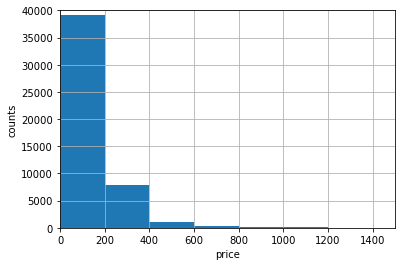

In [36]:
plt.axis([0, 1500, 0, 40000])
plt.xlabel('price')
plt.ylabel('counts')
df['price'].hist(bins=50)

In [46]:
# большая часть цен находится в пределах $200

<AxesSubplot:xlabel='minimum nights', ylabel='counts'>

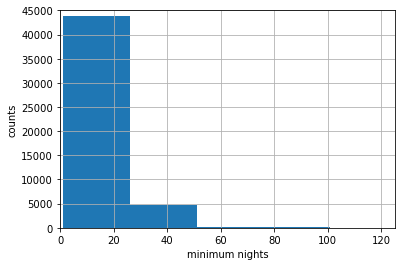

In [40]:
plt.axis([0, 125, 0, 45000])
plt.xlabel('minimum nights')
plt.ylabel('counts')
df['minimum_nights'].hist(bins=50)

In [47]:
# минимально возможный заказ находится в пределах 20 ночей

In [ ]:
# в целом про рынок арендного жилья Нью-Йорка можно сказать, что это рынок краткосрочной аренды недорогого жилья